<a href="https://colab.research.google.com/github/Poorvasaxena106/EDA/blob/main/PS_Exploratory_Data_Analysis_(EDA)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Importing the data

In [23]:
# Importing necessary libraries for analysing the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Mounting drive
#from google.colab import drive
#drive.mount('/content/drive')

In [25]:
# Imporing both sets of data
rev_df = pd.read_csv('/content/EDA_User_Reviews_data.csv')

In [26]:
ps_df = pd.read_csv('/content/EDA_playstore_df.csv')

# Understanding the data

In [27]:
# Checking the shape of dataset
ps_df.shape

(10841, 13)

In [28]:
rev_df.shape

(64295, 5)

In [29]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [31]:
# Checking the information
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [32]:
ps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
ps_df.describe(include= 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [35]:
rev_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [36]:
rev_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [37]:
# Finding out the missing values in the dataframe
ps_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

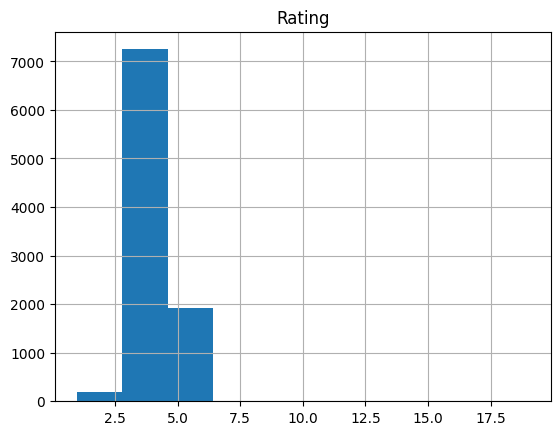

In [38]:
ps_df.hist()

In [39]:
# Checking for any rating above 5
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Since 5 rating be the highest, rating 19 is clearly wrong

In [40]:
# dropping the row 10472
ps_df.drop([10472], inplace = True)

In [41]:
# Checking for the changed being made
ps_df[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

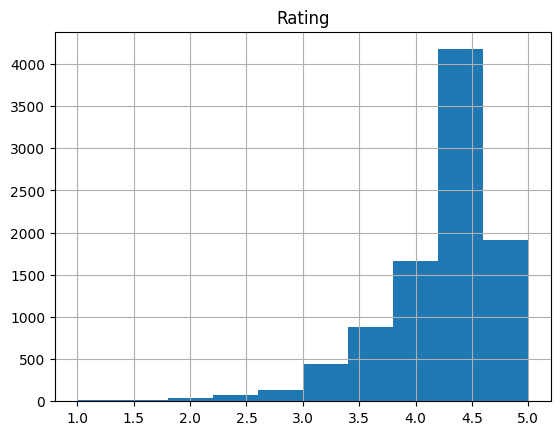

In [42]:
ps_df.hist()

<Axes: >

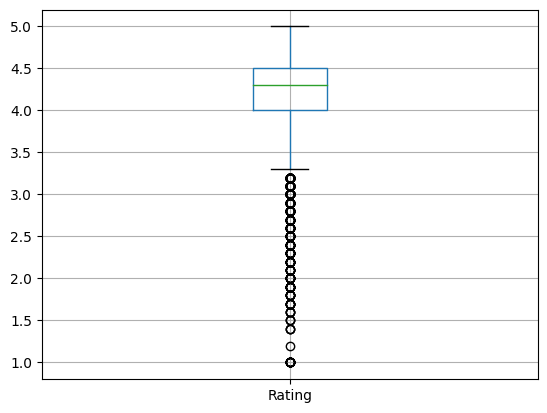

In [43]:
ps_df.boxplot()

In [44]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Not a number values

In [45]:
# Checking for NaN values
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

The Rating column, which has a total of 1474 missing data, now will be filled.

In [46]:
# Filling Null values using aggregate method as Median
ps_df['Rating'] = ps_df['Rating'].fillna(ps_df['Rating'].median())

Filling the other columns' null values with mode of column values

In [47]:
# Filling missing values using Mode
ps_df['Type'].fillna(str(ps_df['Type'].mode().values[0]),inplace=True)
ps_df['Current Ver'].fillna(str(ps_df['Current Ver'].mode().values[0]),inplace=True)
ps_df['Android Ver'].fillna(str(ps_df['Android Ver'].mode().values[0]),inplace=True)

In [48]:
# Checking for any null values
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [49]:
# Before making any changes, have a look at the data type
ps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
# Converting 'installs' column from string to numerical using lambda function
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : float(x))


In [51]:
# Converting 'Reviews' column from string to numerical
ps_df['Reviews'] = pd.to_numeric(ps_df['Reviews'], errors = 'coerce')

In [52]:
# Converting 'Price' column from string to numerical using lambda function
ps_df['Price'] = ps_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_df['Price'] = ps_df['Price'].apply(lambda x : float(x))

In [53]:
# Visible changes in the data types of 'Reviews', 'Price', 'Installs'
ps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [54]:
# Changed values in columns after being converted into numeric
ps_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data representation

In [55]:
# Group by categories to compare category with 'Rating','Price','Reviews'
group = ps_df.groupby('Category')
# Getting the mean of 'Rating'
ra = group['Rating'].agg(np.mean)
print(ra)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

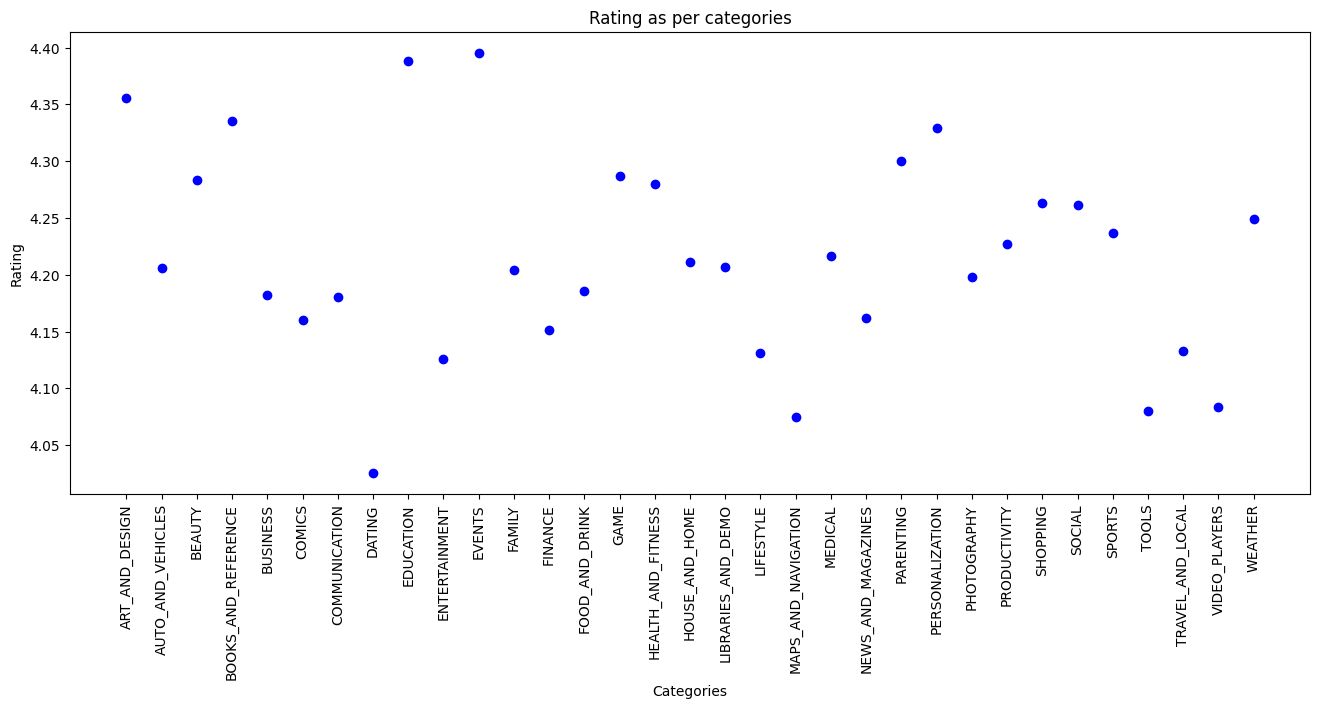

In [56]:
# Comparing category with Rating
plt.figure(figsize=(16,6))
plt.plot(ra,'bo')
plt.xticks(rotation = 90)
plt.title('Rating as per categories')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

In [57]:
# Getting the mean of 'Reviews'
re = group['Reviews'].agg(np.mean)
print(re)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [58]:
# Getting the mean of 'Price'
pr = group['Price'].agg(np.sum)
print(pr)

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

<ipython-input-59-f64b3c1b9625>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(pr,'b--', color= 'b')


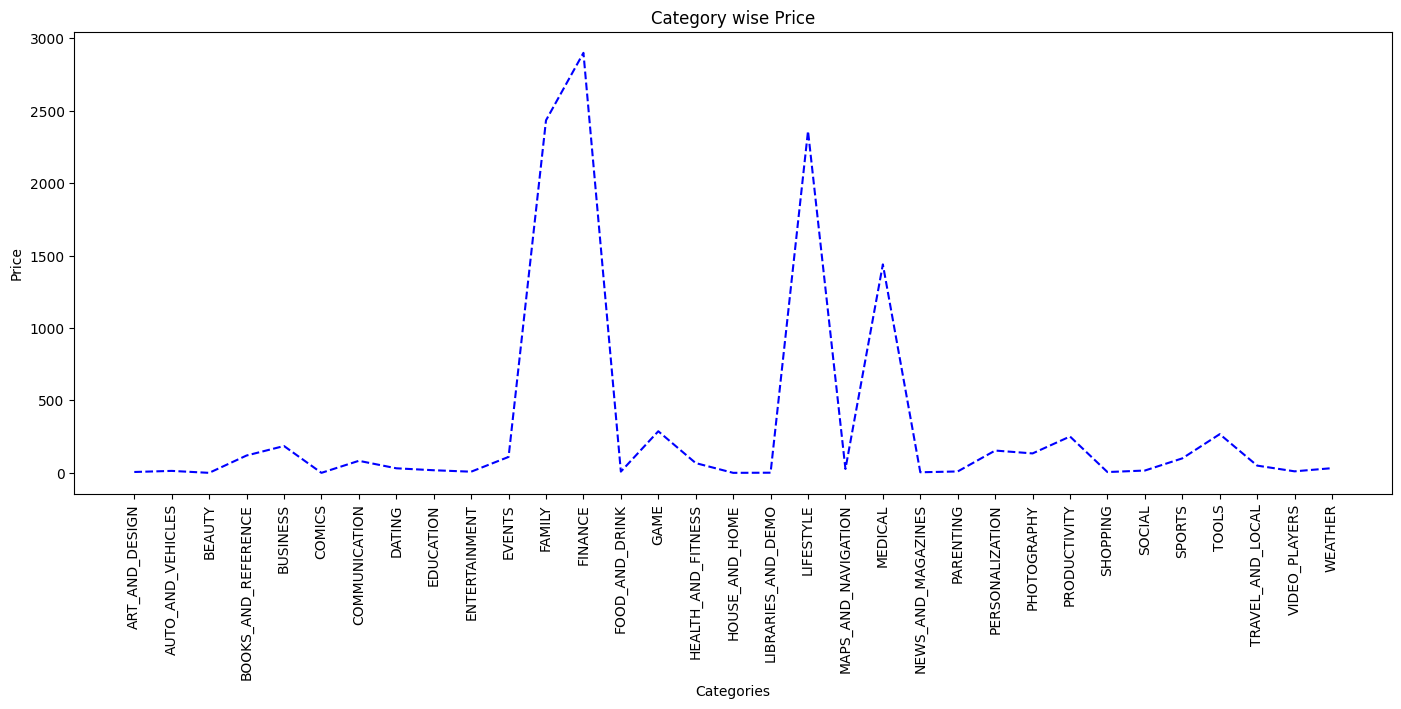

In [59]:
# Comparing category with price
plt.figure(figsize=(17,6))
plt.plot(pr,'b--', color= 'b')
plt.xticks(rotation = 90)
plt.title('Category wise Price')
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()

<ipython-input-60-73b135749806>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.plot(re, 'g^', color= 'R')


ValueError: ignored

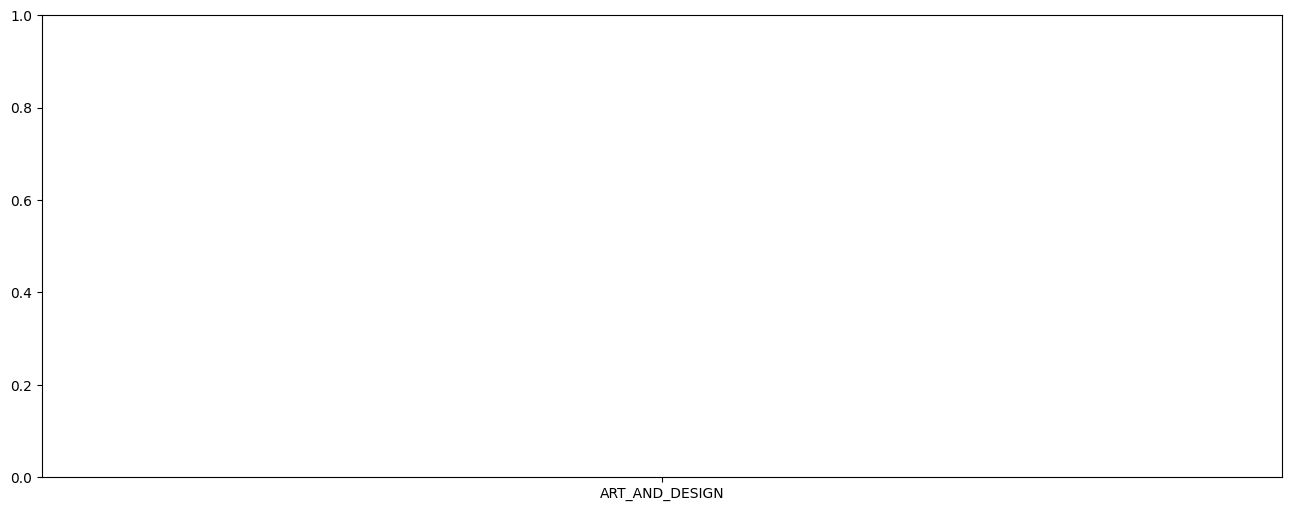

In [60]:
# Comparing category with Reviews
plt.figure(figsize=(16,6))
plt.plot(re, 'g^', color= 'R')
plt.xticks(rotation = 90)
plt.title('Category wise Reviews')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

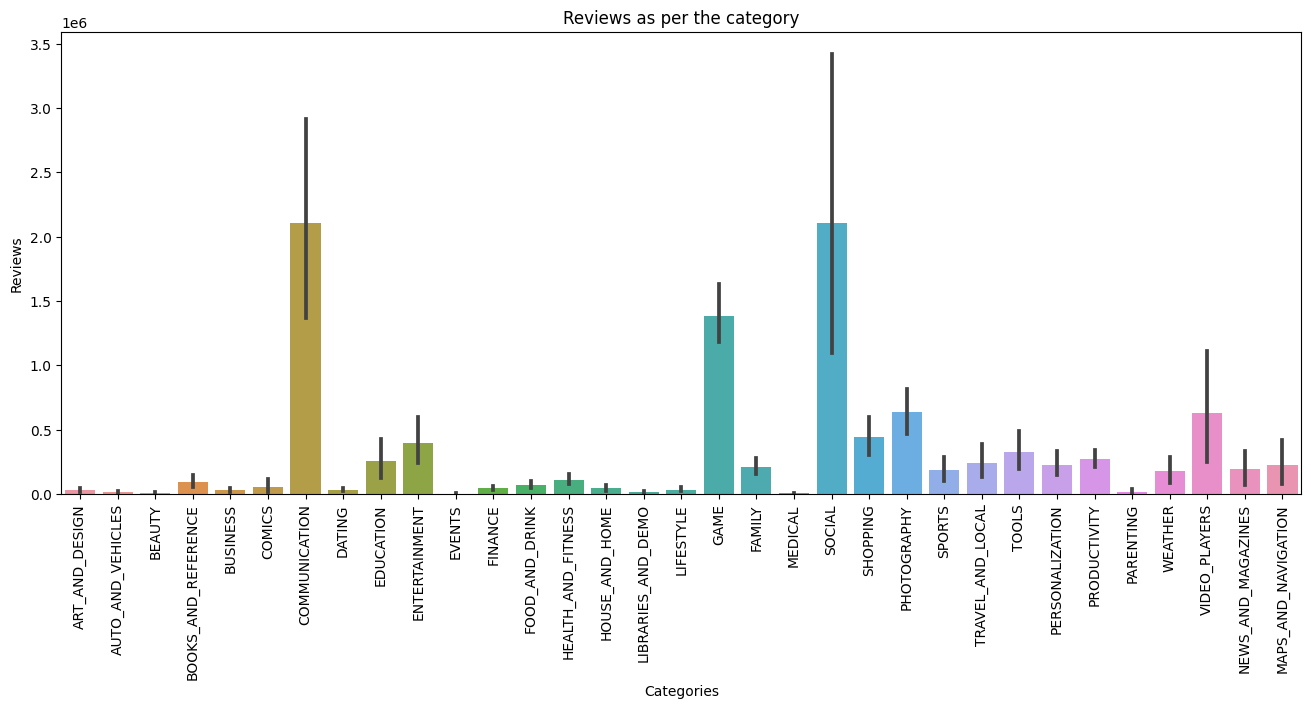

In [61]:
plt.figure(figsize=(16,6))
sns.barplot(x = ps_df['Category'], y = ps_df['Reviews'])
plt.xticks(rotation = 90)
plt.title('Reviews as per the category')
plt.xlabel('Categories')
plt.ylabel('Reviews')
plt.show()

It would be fascinating to learn how each of the three metrics—ratings, reviews, and price—is distributed.

<ipython-input-62-5e3d5c816a4b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps_df['Rating'], hist = True, color = 'r' )


<Axes: xlabel='Rating', ylabel='Density'>

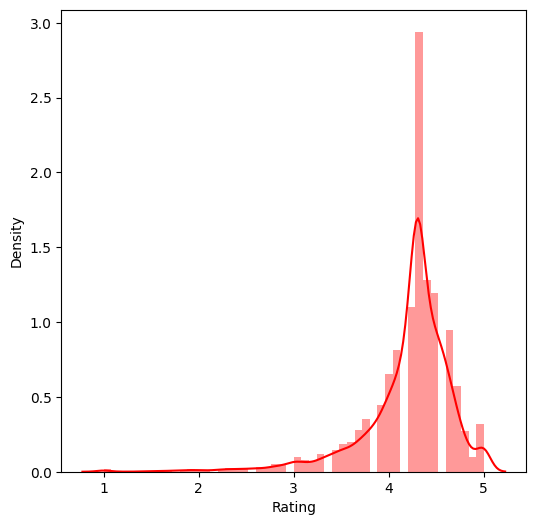

In [62]:
plt.figure(figsize = (6,6))
sns.distplot(ps_df['Rating'], hist = True, color = 'r' )

As can be seen, the majority of ratings fall between 4 and 5.

<ipython-input-63-6140706fee10>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps_df['Price'], hist = True, color = 'b' )


<Axes: xlabel='Price', ylabel='Density'>

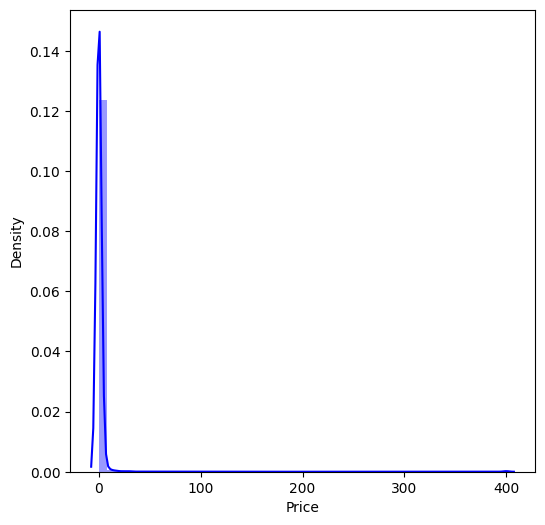

In [63]:
plt.figure(figsize = (6,6))
sns.distplot(ps_df['Price'], hist = True, color = 'b' )

As per the price, the plot shows the majority of apps are free

<ipython-input-64-b4a24eaf4515>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ps_df['Reviews'], hist = True, color = 'g' )


<Axes: xlabel='Reviews', ylabel='Density'>

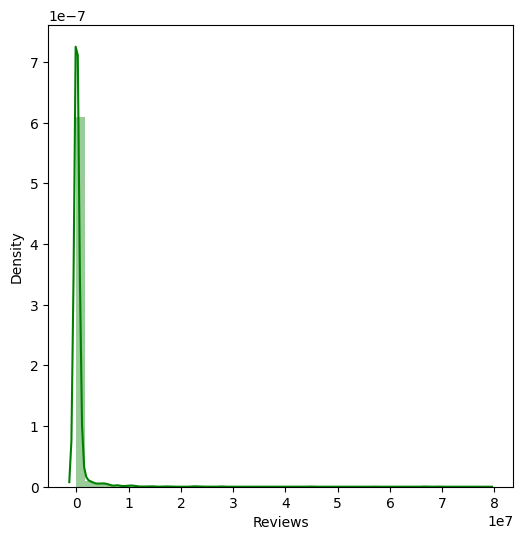

In [64]:
plt.figure(figsize = (6,6))
sns.distplot(ps_df['Reviews'], hist = True, color = 'g' )

Regarding reviews, the majority of the count are close to zero.

We can observe that while Reviews and Price are significantly biassed to the left, Ratings is positively skewed.

<Axes: xlabel='Type', ylabel='count'>

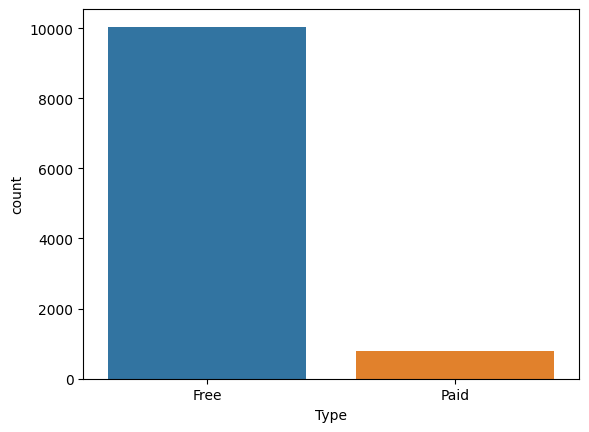

In [65]:
# Data Type and count
sns.countplot(x = 'Type', data = ps_df)

Comparing between the two, clearly free apps are downloaded more than the paid apps

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '5.0'),
  Text(3, 0, '10.0'),
  Text(4, 0, '50.0'),
  Text(5, 0, '100.0'),
  Text(6, 0, '500.0'),
  Text(7, 0, '1000.0'),
  Text(8, 0, '5000.0'),
  Text(9, 0, '10000.0'),
  Text(10, 0, '50000.0'),
  Text(11, 0, '100000.0'),
  Text(12, 0, '500000.0'),
  Text(13, 0, '1000000.0'),
  Text(14, 0, '5000000.0'),
  Text(15, 0, '10000000.0'),
  Text(16, 0, '50000000.0'),
  Text(17, 0, '100000000.0'),
  Text(18, 0, '500000000.0'),
  Text(19, 0, '1000000000.0')])

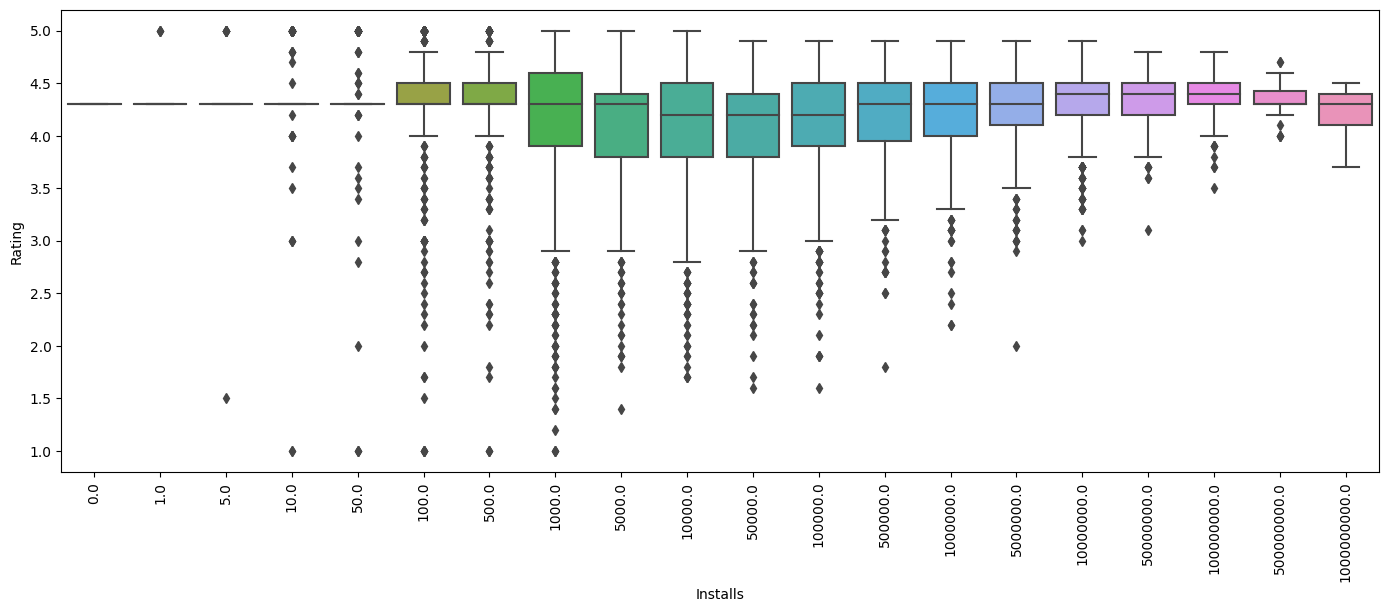

In [66]:
plt.figure(figsize= (17,6))
sns.boxplot(x = 'Installs',y='Rating',data=ps_df)
plt.xticks(rotation=90)

The accompanying plot demonstrates that for all install counts, the median rating ranges from 4.0 to 4.5.

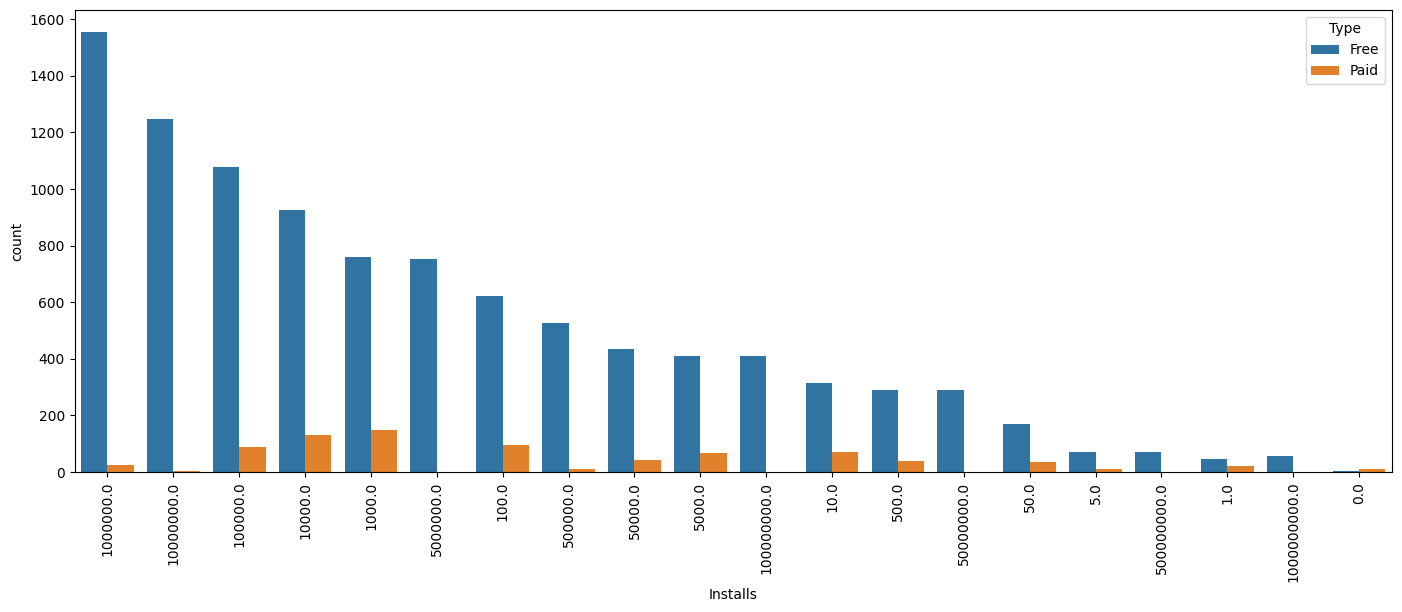

In [67]:
plt.figure(figsize= (17,6))
sns.countplot(x = 'Installs', hue='Type',data=ps_df, order = ps_df['Installs'].value_counts().index)
plt.xticks(rotation=90);

We can observe that more people have downloaded the free apps than the premium ones.

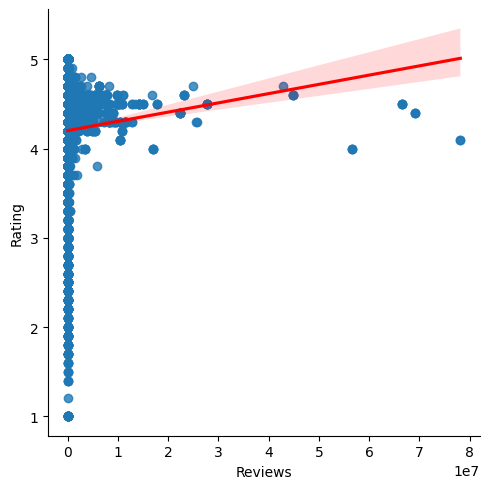

In [68]:
# Implot for rating and reviews
g = sns.lmplot(x = 'Reviews',y='Rating',
               data= ps_df, line_kws={'color' : 'red'})

Most of the ratings are between 4 and 5, as shown in the plot above.

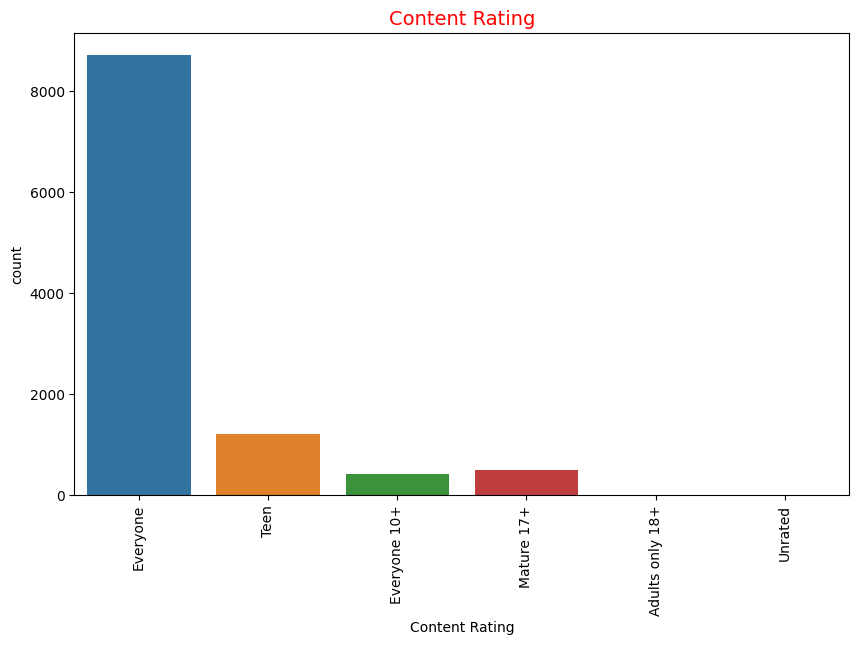

In [69]:
# Content ratings for different age groups
plt.figure(figsize=(10,6))
sns.countplot(data = ps_df, x = 'Content Rating')
plt.xticks(rotation=90)
plt.title('Content Rating', color = 'red', fontsize = 14)
plt.show()

In [70]:
# Finding out unique values using Unique() method
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [71]:
# Replacing certain strings
ps_df['Size'] = ps_df.Size.str.replace("k","")
ps_df['Size'] = ps_df.Size.str.replace("M","000")
ps_df['Size'] = ps_df.Size.replace("Varies with device", np.nan)
ps_df['Size'] = ps_df['Size'].astype(float)

In [72]:
ps_df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

Now after all the mining and data manipulaton, we can draw some valuable conclusions about our data and get significant insights, and find answers to some important questions.

# 1. Which are the most installed category of apps?

In [73]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Most_installed_apps = ps_df.groupby('Category')[['Installs']].sum().sort_values(by= 'Installs', ascending = False)
Most_installed_apps.head()


,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10


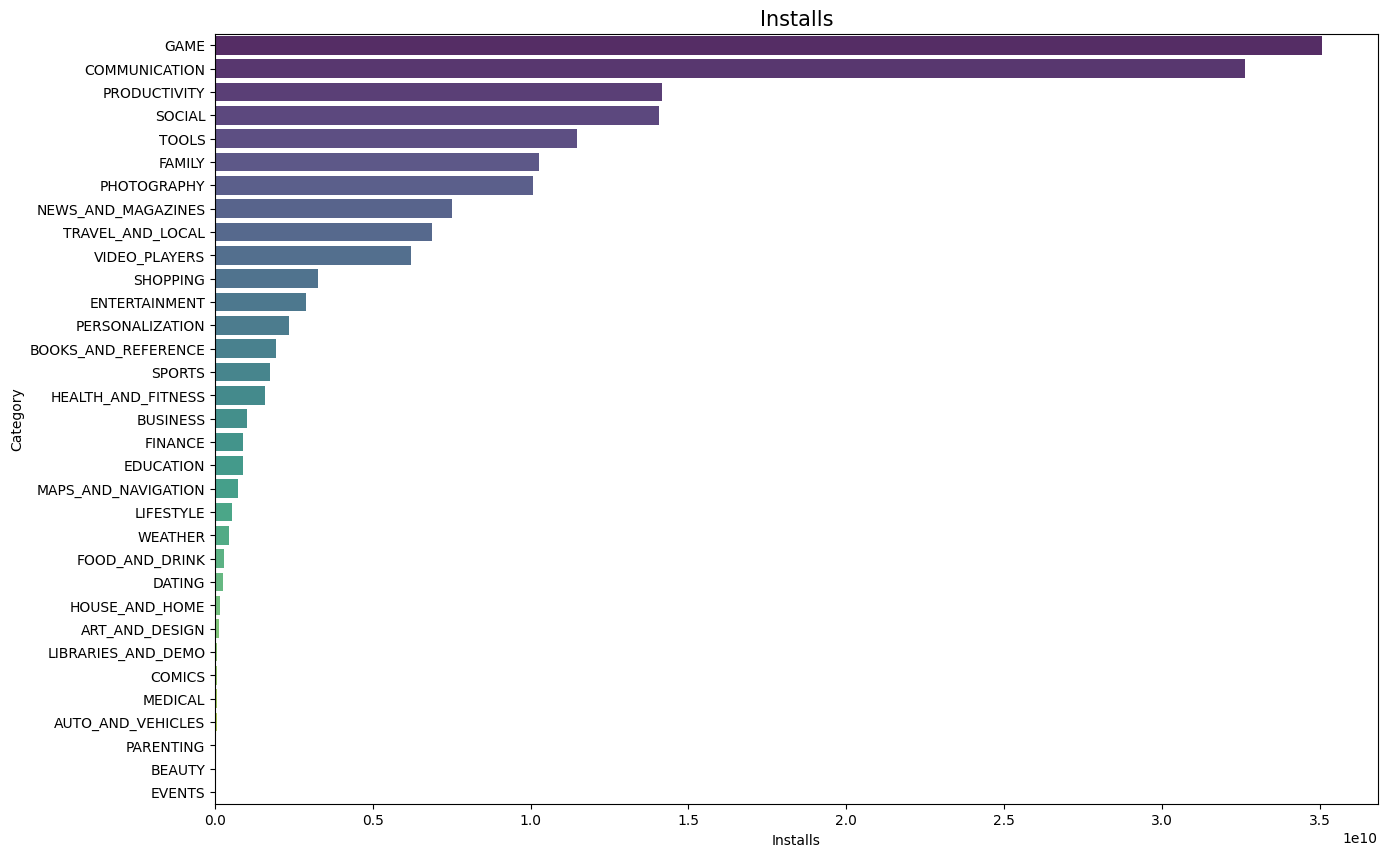

In [74]:
xaxis = []
yaxis = []

for i in range(len(Most_installed_apps)):
    xaxis.append(Most_installed_apps.Installs[i])
    yaxis.append(Most_installed_apps.index[i])

plt.figure(figsize=(15,10))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = xaxis, y = yaxis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 15);

The top categories with the highest downloads, according to the visualisation above, are Game, Communication, Productivity, Social, Tools, and Family.

# 2. Name the categories which are at the top in the analysis?

In [75]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [76]:
ps_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [77]:
y = ps_df['Category'].value_counts().index
x = ps_df['Category'].value_counts()
xaxsis = []
yaxsis = []
for i in range(len(x)):
    xaxsis.append(x[i])
    yaxsis.append(y[i])

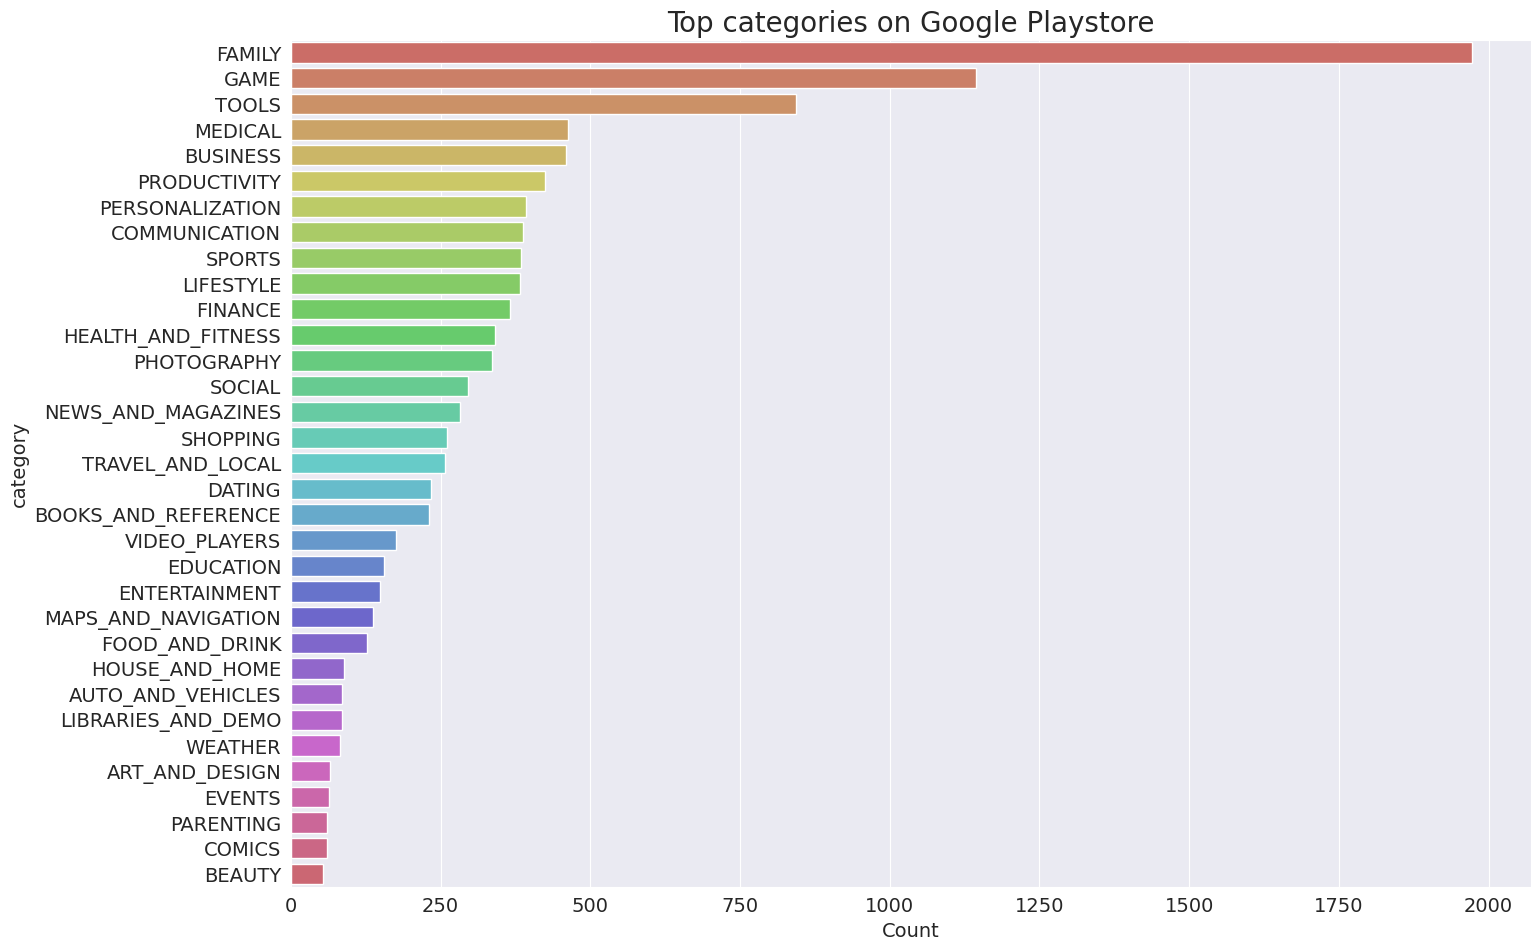

In [78]:
plt.figure(figsize=(16,11))
plt.xlabel("Count")
plt.ylabel("category")

graph = sns.barplot(x = xaxsis, y = yaxsis, palette= "hls")
graph.set_title("Top categories on Google Playstore", fontsize = 20);

Our dataset contains 33 categories. Family and video games take centre stage, with the beauty category way down in the ranking.

# 3. How many percentage of apps are free and paid?

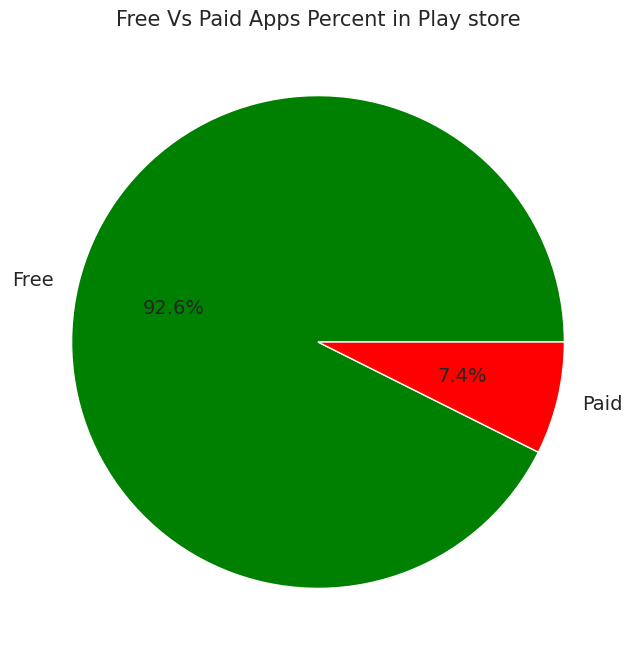

In [79]:
plt.figure(figsize=(8,8))
labels = ps_df['Type'].value_counts(sort = True).index
sizes = ps_df['Type'].value_counts(sort = True)
colors = ["green","red"]
explode = (0.3,0)
plt.pie(sizes, explode= None,labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Free Vs Paid Apps Percent in Play store',size = 15)
plt.show()

The graph above shows that 92.6% of the apps in the Google Play store are free and approx 7.4%  are paid.

**We can observe from the above plot that the Everyone category has the most apps.**

# 4. How the apps are being distributed?

In [80]:
ps_df['Rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

<ipython-input-81-461a1d8e3614>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(ps_df.Rating, color = 'Green', shade = True)


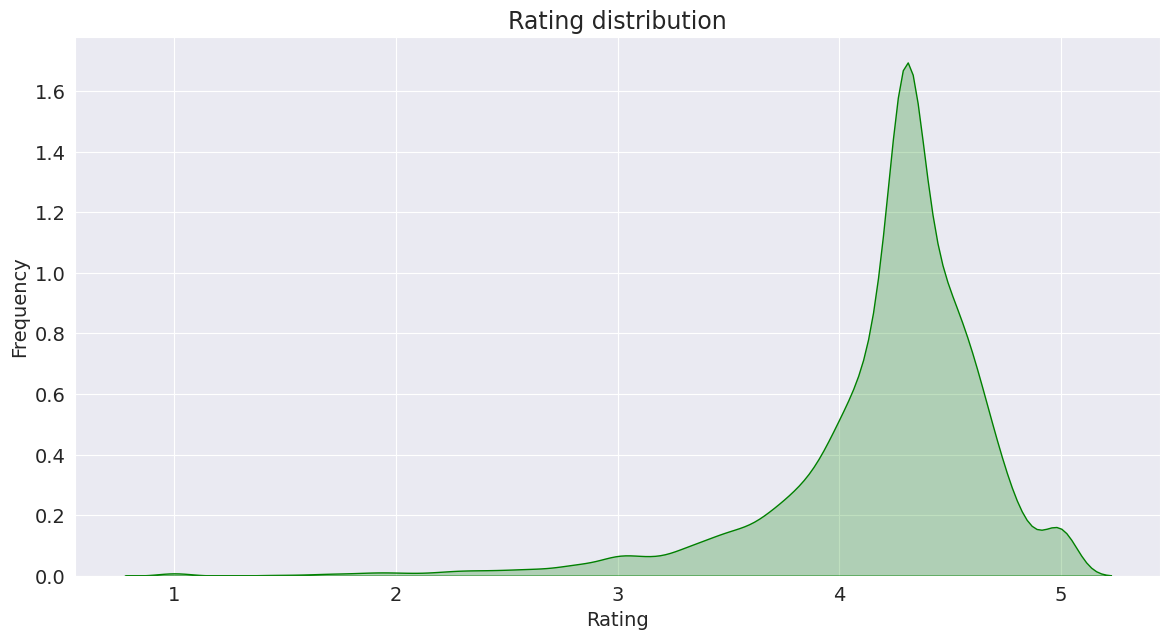

In [81]:
plt.figure(figsize= (14,7))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(ps_df.Rating, color = 'Green', shade = True)
plt.title('Rating distribution', size = 17);

We can infer from the graph above that the majority of apps in the Google Play store have ratings between 3.5 and 4.8.bold text

# 5. Which are the apps that stand on top in terms of content rating?

In [82]:
x = ps_df['Content Rating'].value_counts().index
y = ps_df['Content Rating'].value_counts()
xaxis = []
yaxis = []
for i in range(len(x)):
    xaxis.append(x[i])
    yaxis.append(y[i])

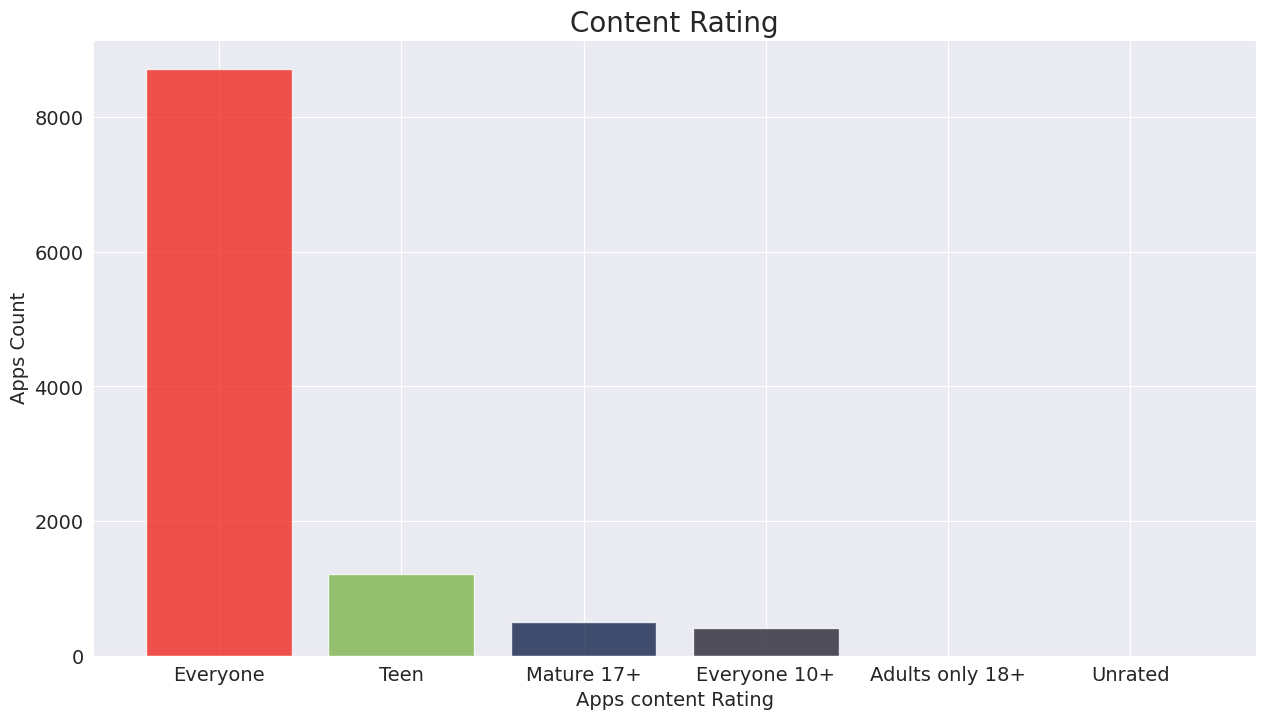

In [83]:
plt.figure(figsize=(15,8))
plt.bar(xaxis,yaxis,width=0.8,color=['#EF2920','#7eb54e','#15244C','#292734','#ECC5F2','#CD202D',], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps Count');
plt.xlabel('Apps content Rating');

The above plot reveals that the Everyone category has the most apps.

# 6. What apps are having the most number of reviews in Playstore?

In [84]:
Most_rev = ps_df.sort_values(by='Reviews', ascending=False).head(15)
Most_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


In terms of most number of reviews, Facebook stands at the top, WhatsApp messenger at second and Instagram at third.

# 7. What are the top 7 paid apps on playstore

In [85]:
topapp = ps_df[ps_df['Type'] == 'Paid'].sort_values(by = 'Price', ascending = False).head(7)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24456 

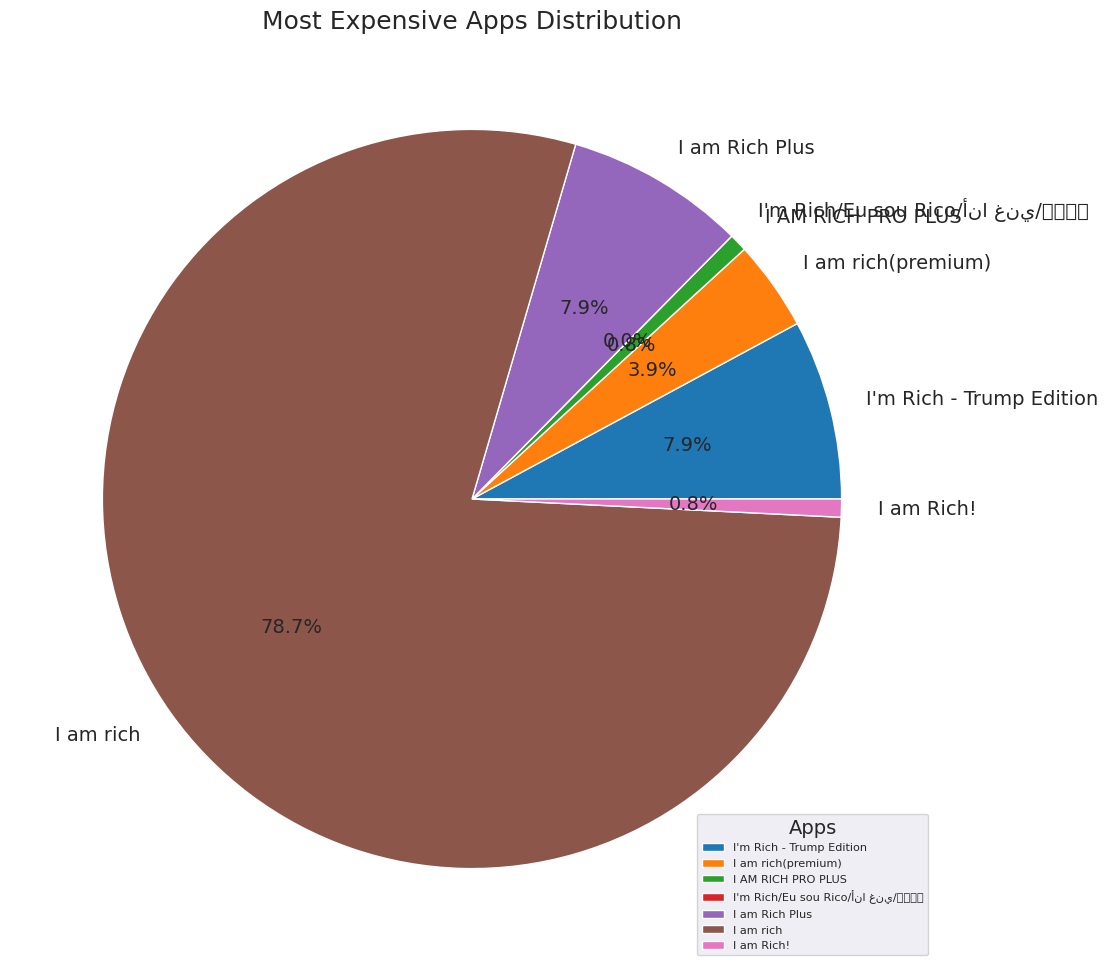

In [86]:
plt.figure(figsize=(14,12));
plt.pie(topapp.Installs, explode=None, labels=topapp.App, autopct='%1.1f%%', startangle= 0);
plt.title('Most Expensive Apps Distribution',size = 18);
plt.legend(topapp.App, loc="lower right", title="Apps",fontsize = "xx-small");

We can learn from the graph above that the I am Rich app is the most expensive one available on Google Play.

# **Summary:**

A successful app-making firm is built on a thorough market data study. Too many times, businesses fail to conduct a thorough market study and are forced to rely solely on speculation.

Drawing a nearly accurate marketing strategy for the app-making industry is made possible by data analysis. This implies they can market to the appropriate audiences for the company using the right combination of goods or services. The dataset and relevant libraries were loaded first, then the data was cleaned, which involved replacing the null values with the column's median. NaN values were identified and replaced.

Then the dataset was categorised by "Category" and contrasted using the three criteria of "Ratings," "Reviews," and "Price." To determine the trend, the result was plotted. For simplicity of analysis, the necessary columns were changed from str to numeric type. Seven questions were then addressed whch would be useful for an app-making company to target the appropriate market, study its competition, and grow further.


***The set of questions which were chosen for analysis are:***

Question 1: Which are the most installed category of apps?

Question 2: Name the categories which are at the top in the analysis?

Question 3: What is the percentage of apps which are free and paid?

Question 4: How the apps are being distributed?

Question 5: Which are the apps that stand on top in terms of content rating?

Question 6: What apps are having the most number of reviews on Playstore?

Question 7: What are the top 7 paid apps on playstore?

***The outcomes of the detailed analysis of each question lead to the following observations:***

Observation 1:  Apps offering content for the "Everyone" age group are in the lead.

Observation 2: Only 7.4% are the paid apps and 92.6%  of the apps are free.

Observation 3: The most downloaded app is "I Am Rich." This is in line with the finding that one of the most popular downloaded apps are the financial apps.

Observation 4: Family, Finance, and lifestyle apps cost more than the other available apps in the playstore.

Observation 5: The most reviews are for communication and social networking apps.

Observation 6: The apps for events and education have received the greatest scores, followed by those for arts and design.

Observation 7: Installing paid apps versus free apps has a significant difference. Free apps are installed more than the expensive apps.

Observation 8: The top categories, according to the study, are Family, Games, and Tolls.